TASK 1 :

● Perform EDA
● Check whether the dataset is balanced or not (using target variable “Label”)
● Check whether there is any empty records, categorical feature, or duplicate records, yes
Then handle this and give a brief explanation why you have chosen this technique in a
text cell or “jupyter/colab”
● Analyze your dataset and think if feature scaling is required or not. If yes then apply any
scaling technique based on your distribution.
● Split your dataset in training, testing, and validation. The train split will be 80% and the
test will be 20%. In the validation split your training samples will be 70% and the
validation set will be 30%. Briefly describe why we use a validation set in a text cell.
Declare Random_state=0
● Apply Random Forest, XGBoost, AdaBoost and check model training and testing
accuracy.
● Compare the Training and Testing Results of all three algorithms

In [3]:
import pandas as pd
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier


In [4]:
df = pd.read_csv(r'/content/heart.csv')
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
df.duplicated().sum()

np.int64(723)

In [27]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(302, 14)

In [33]:
df.size #rows x columns

4228

In [34]:
X = df.drop('target',axis=1)
y = df['target']

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_val,X_val,y_train_val,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)


In [7]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=0)

In [36]:
models = {"Random Forest": rf, "XGBoost": xgb, "AdaBoost": ada}
results = {}
for name, model in models.items():
    model.fit(X_train_val, y_train_val)

    y_pred_train = model.predict(X_train_val)
    train_acc = accuracy_score(y_train_val, y_pred_train)

    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    results[name] = {"Training Accuracy": train_acc, "Testing Accuracy": test_acc}

results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


               Training Accuracy  Testing Accuracy
Random Forest           1.000000          0.819672
XGBoost                 1.000000          0.786885
AdaBoost                0.916667          0.737705


TASK 2
● Extract Only two Attributes with independent variable to analyze your results (restEcg
and Oldpeak)
● Now train a Voting Classifier using (Decision Tree, KNN, Random Forest and XGboost)
● Check which Voting Parameter will give you the best Accuracy either soft or hard
● Check the best weights for these models.
● Plot the Bias and Variance Tradeoff Graph after Voting Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X = df[['restecg','oldpeak']]
y = df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100,random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=0)

#hard voting
voting_hard = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf),('xgb',xgb)],voting='hard')
voting_hard.fit(X_train,y_train)
y_pred_hard = voting_hard.predict(X_test)
print('Hard voting accuracy: ',accuracy_score(y_test,y_pred_hard))

#soft voting
voting_soft = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf),('xgb',xgb)],voting='soft')
voting_soft.fit(X_train,y_train)
y_pred_soft = voting_soft.predict(X_test)
print('\nsoft voting accuracy: ',accuracy_score(y_test,y_pred_soft))



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Hard voting accuracy:  0.6065573770491803

soft voting accuracy:  0.5901639344262295


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
import numpy as np

best_acc = 0
best_weights = None

for w1 in [1,2]:
    for w2 in [1,2]:
        for w3 in [1,2]:
            for w4 in [1,2]:
                voting_w = VotingClassifier(
                    estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
                    voting="soft",
                    weights=[w1, w2, w3, w4]
                )
                voting_w.fit(X_train, y_train)
                acc = accuracy_score(y_test, voting_w.predict(X_test))
                if acc > best_acc:
                    best_acc = acc
                    best_weights = (w1, w2, w3, w4)

print("Best Weights:", best_weights)
print("Best Weighted Accuracy:", best_acc)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:13] WARNING: /w

Best Weights: (1, 1, 1, 1)
Best Weighted Accuracy: 0.5901639344262295


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:07:21] WARNING: /w

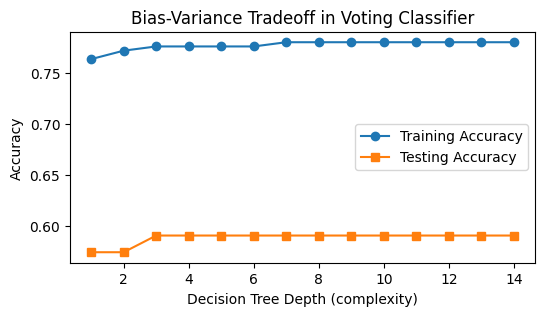

In [39]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
depths = range(1, 15)

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=0)
    voting = VotingClassifier(
        estimators=[("dt", dt), ("knn", knn), ("rf", rf), ("xgb", xgb)],
        voting="soft",
        weights=best_weights
    )
    voting.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, voting.predict(X_train)))
    test_acc.append(accuracy_score(y_test, voting.predict(X_test)))

plt.figure(figsize=(6,3))
plt.plot(depths, train_acc, label="Training Accuracy", marker="o")
plt.plot(depths, test_acc, label="Testing Accuracy", marker="s")
plt.xlabel("Decision Tree Depth (complexity)")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff in Voting Classifier")
plt.legend()
plt.show()


Hard Voting → chooses majority class → works well if models are diverse.

Soft Voting → averages probabilities → usually more accurate since it uses confidence levels.

Weights → give higher importance to stronger models (e.g., XGBoost, Random Forest).

Bias-Variance Graph →

Low depth → underfitting (high bias, low variance).

Very high depth → overfitting (low bias, high variance).

Middle depth → good generalization.

TASK 3

● Extract Only two Attributes with independent variable to analyze your results (restEcg
and Chol)
● Now train a Voting Classifier using (Random Forest and Adaboost)
● Plot the training and testing accuracy of individual Random Forest and XGBoost +
Accuracy graph of Voting Ensemble Technique as well.

Random Forest Training Accuracy:  0.8838174273858921
Random Forest Testing Accuracy:  0.6065573770491803

AdaBoost Training Accuracy:  0.6099585062240664
AdaBoost Testing Accuracy:  0.5245901639344263

Voting Classifier Training Accuracy:  0.7344398340248963
Voting Classifier Testing Accuracy:  0.47540983606557374


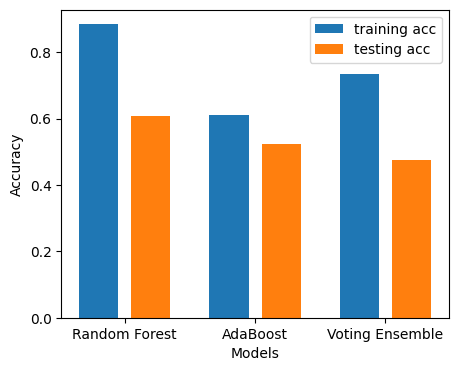

In [40]:
from sklearn.ensemble import AdaBoostClassifier

X = df[['restecg','chol']]
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

rf = RandomForestClassifier(n_estimators=100,random_state=0)
ada = AdaBoostClassifier(n_estimators = 100,random_state =0)

voting = VotingClassifier(estimators=
                          [('rf',rf),('ada',ada)],
                          voting = 'hard')
rf.fit(X_train,y_train)
ada.fit(X_train,y_train)
voting.fit(X_train,y_train)

rf_train_acc = accuracy_score(y_train,rf.predict(X_train))
rf_test_acc = accuracy_score(y_test,rf.predict(X_test))

ada_train_acc = accuracy_score(y_train,ada.predict(X_train))
ada_test_acc = accuracy_score(y_test,ada.predict(X_test))

voting_train_acc = accuracy_score(y_train,voting.predict(X_train))
voting_test_acc = accuracy_score(y_test,voting.predict(X_test))

print('Random Forest Training Accuracy: ',rf_train_acc)
print('Random Forest Testing Accuracy: ',rf_test_acc)
print('\nAdaBoost Training Accuracy: ',ada_train_acc)
print('AdaBoost Testing Accuracy: ',ada_test_acc)
print('\nVoting Classifier Training Accuracy: ',voting_train_acc)
print('Voting Classifier Testing Accuracy: ',voting_test_acc)

# plotting
models = ['Random Forest','AdaBoost','Voting Ensemble']
train_acc = [rf_train_acc,ada_train_acc,voting_train_acc]
test_acc = [rf_test_acc,ada_test_acc,voting_test_acc]

x = np.arange(len(models))
plt.figure(figsize=(5,4))
plt.bar(x-0.2, train_acc ,width=0.3,label='training acc')
plt.bar(x+0.2,test_acc,width=0.3,label='testing acc')
plt.xticks(x,models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()